### decesion tree

#### Importing the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import pandas as pd
from scipy import interp
import os
import joblib
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix, auc, roc_curve, precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import label_binarize
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [2]:
df = pd.read_csv('wine.data', header=None)

In [3]:
df.columns = ['label', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Of_Ash', 'Magnesium', 'Total_Phenols', 'Flavanoids', 
             'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315_Of_Diluted_Wines', 
             'Proline']

In [4]:
df.head()

,label,Alcohol,Malic_Acid,Ash,Alcalinity_Of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315_Of_Diluted_Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 14)

In [6]:
#database information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
label                           178 non-null int64
Alcohol                         178 non-null float64
Malic_Acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_Of_Ash               178 non-null float64
Magnesium                       178 non-null int64
Total_Phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid_Phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color_Intensity                 178 non-null float64
Hue                             178 non-null float64
OD280_OD315_Of_Diluted_Wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
#checking for null values
df.isnull().sum()

label                           0
Alcohol                         0
Malic_Acid                      0
Ash                             0
Alcalinity_Of_Ash               0
Magnesium                       0
Total_Phenols                   0
Flavanoids                      0
Nonflavanoid_Phenols            0
Proanthocyanins                 0
Color_Intensity                 0
Hue                             0
OD280_OD315_Of_Diluted_Wines    0
Proline                         0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


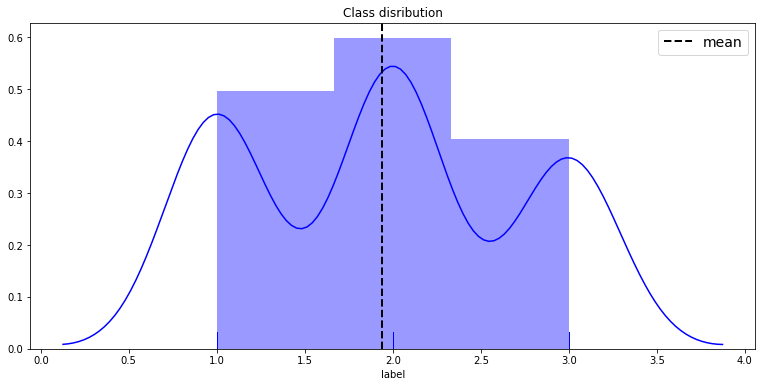

In [8]:
#we can check the distribution of the target label
plt.figure(figsize=(13,6))
sns.distplot(df["label"],color="b",rug=True)
plt.axvline(df["label"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Class disribution")
plt.show()

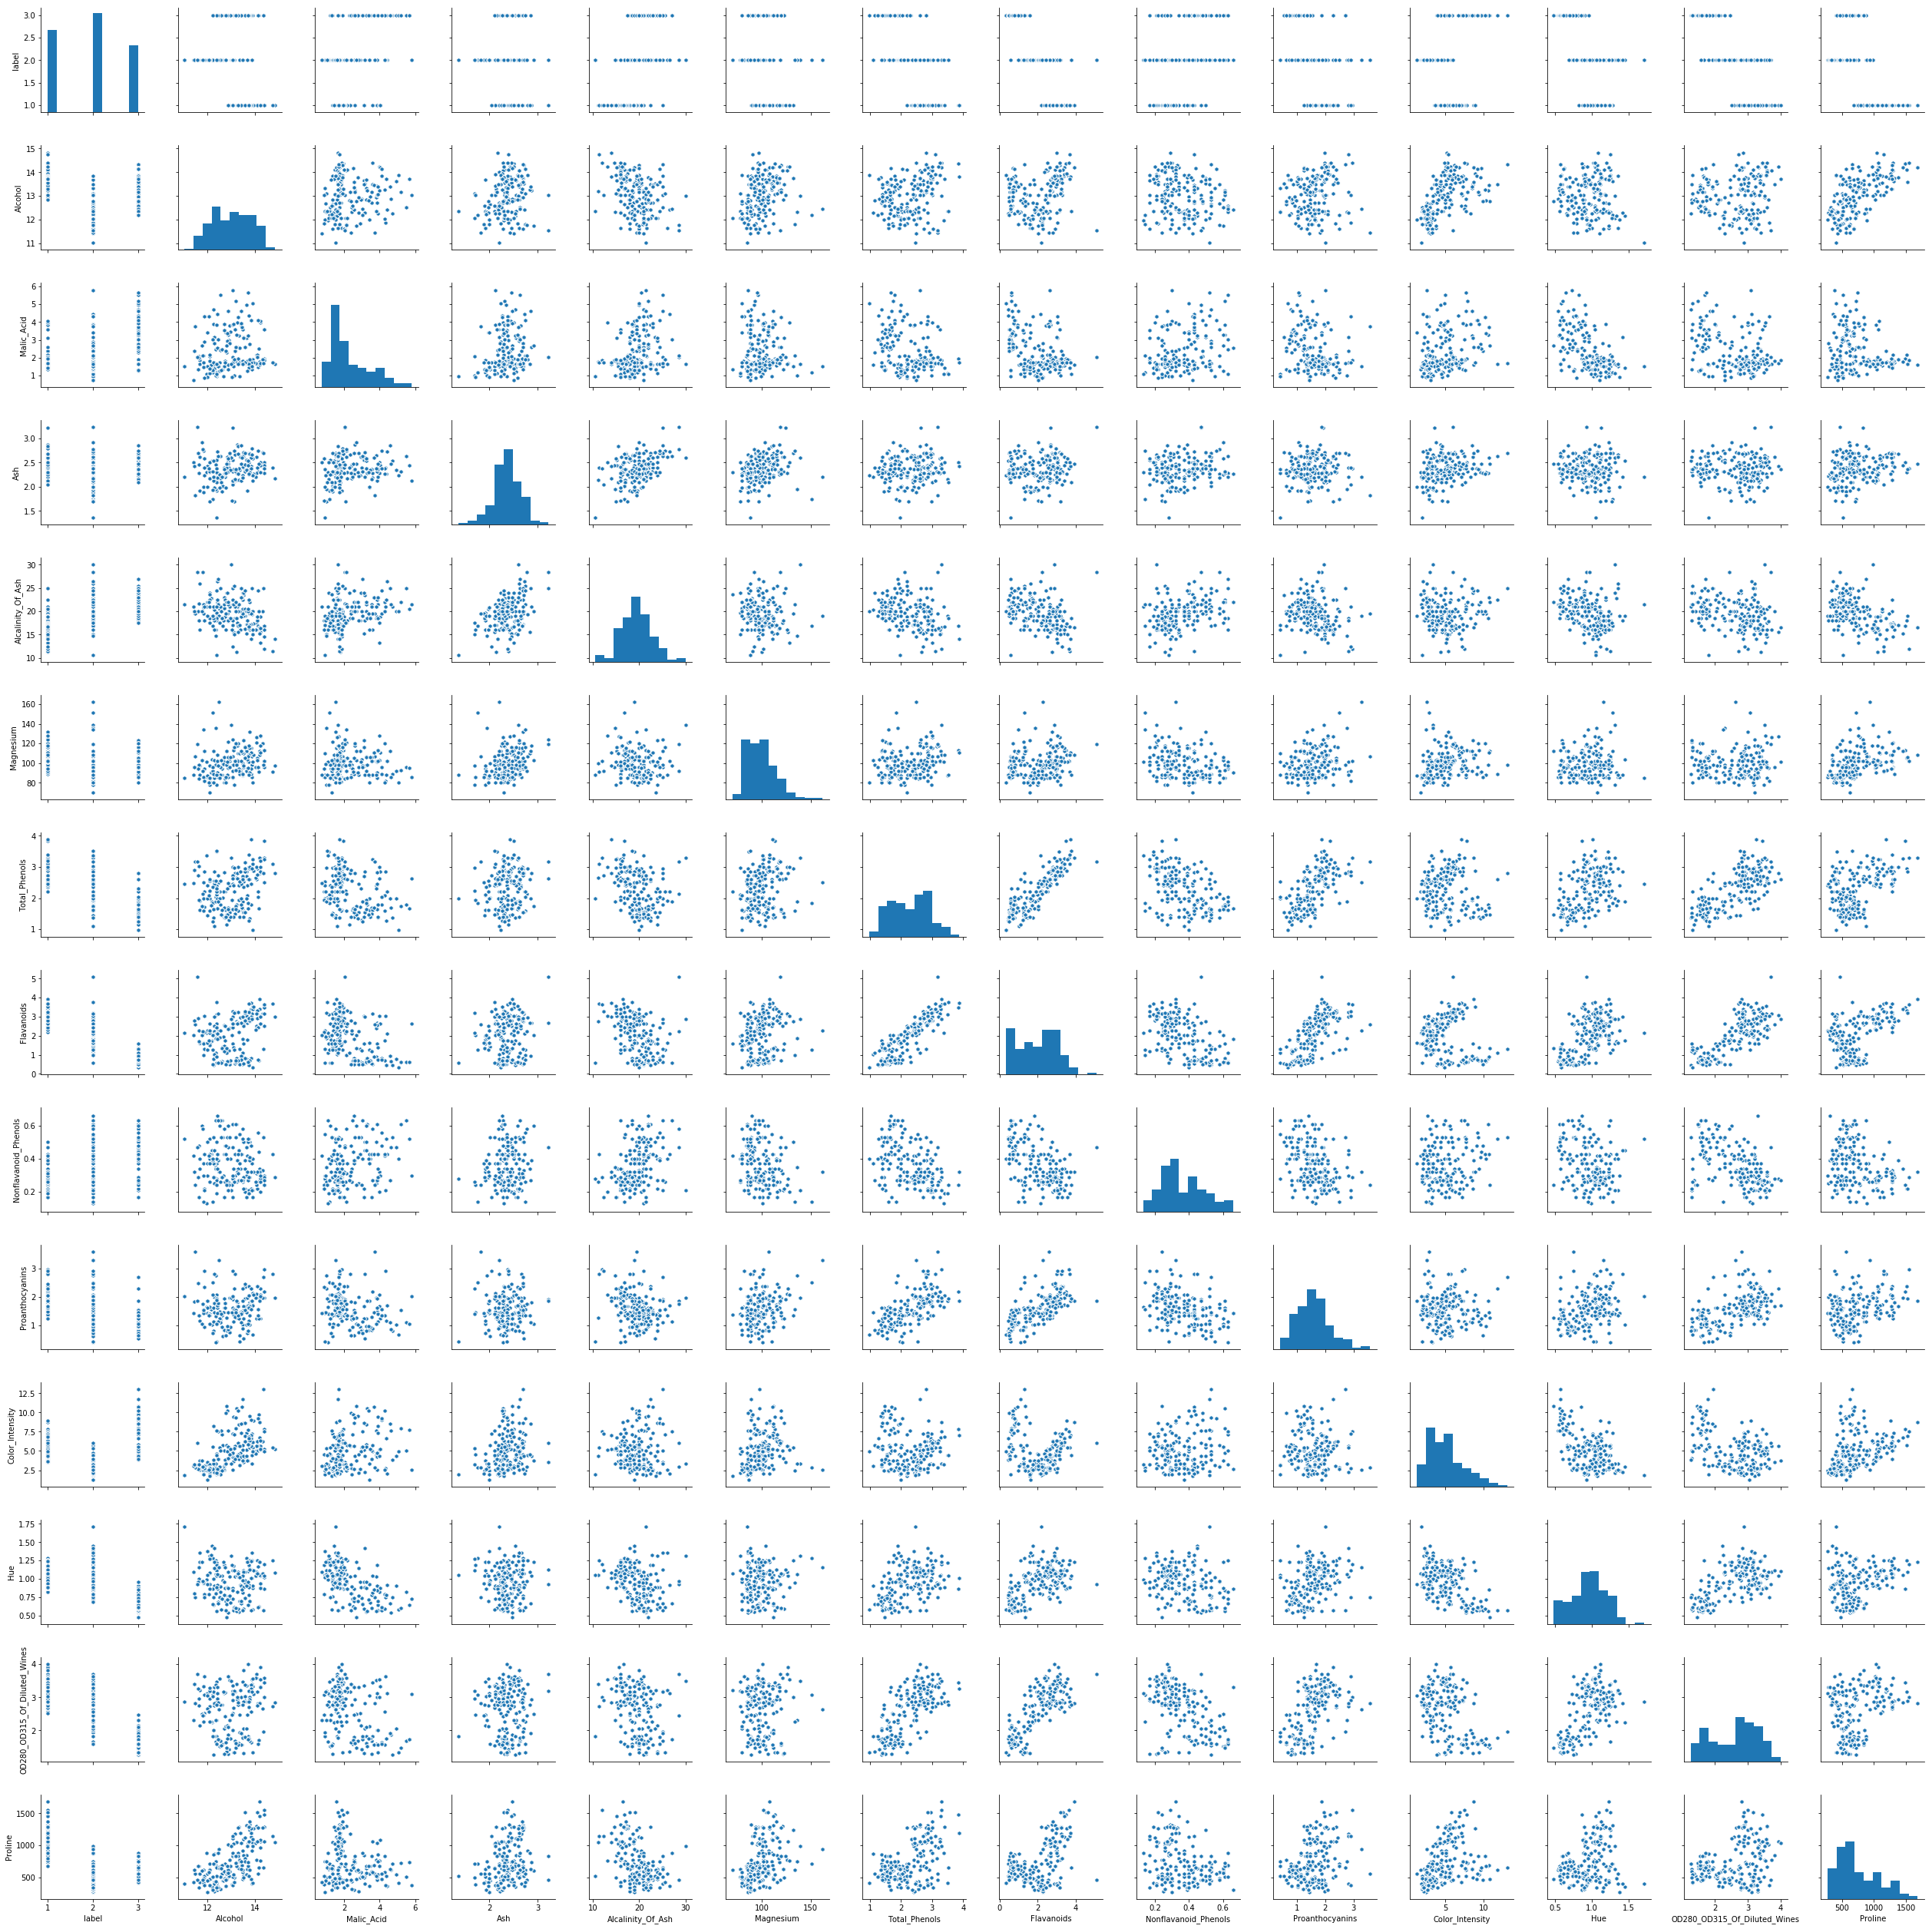

In [9]:
#we can see the relationship between the variables
sns.pairplot(df,markers="h")
plt.show()

In [10]:
#Randomise the dataset
df=df.reindex(np.random.permutation(df.index))


In [11]:
df.head()

,label,Alcohol,Malic_Acid,Ash,Alcalinity_Of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315_Of_Diluted_Wines,Proline
30,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
76,2,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392
84,2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
87,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515


### Split the data

In [12]:
df_labels = df['label']
df_features = df.drop('label', axis=1)

In [13]:
df_train = df_features.sample(frac=0.7, random_state=42) #random state is a seed value
df_labels_train = df_labels[df_train.index]
df_test = df_features.drop(df_train.index)
df_labels_test = df_labels[df_test.index]

In [14]:
print('Training data samples:') 
df_train.shape, df_labels_train.shape

Training data samples:


((125, 13), (125,))

In [15]:
print('Testing data samples:')
df_test.shape, df_labels_test.shape

Testing data samples:


((53, 13), (53,))

### Helper functions

#### Check if the data is pure

In [16]:
def check_purity(labels):
    unique_labels = labels.unique()
    if len(unique_labels) == 1:
        return True
    return False

In [17]:
check_purity(df_labels_train)

False

In [18]:
print(df_labels_train[:3])

25     1
165    3
120    2
Name: label, dtype: int64


In [19]:
check_purity(df_labels_train[:3])

False

#### Perform a majority classification

In [20]:
def classify(labels):
    unique_labels = labels.unique()
    unique_values = []
    for i in range(len(unique_labels)):
        unique_values.append(len(labels[labels == unique_labels[i]]))
    return unique_labels[np.argmax(unique_values)]

In [21]:
print(df_labels_train[8:10])

34    1
78    2
Name: label, dtype: int64


In [22]:
classify(df_labels_train[8:10])

1

#### Get all possible tree splits for each attribute

In [23]:
def get_tree_splits(attributes):
    potential_splits = {}
    for col_idx in range(attributes.shape[1]):
        potential_splits[col_idx] = []
        #print(attributes.iloc[:, col_idx])
        unique_attr = np.sort(attributes.iloc[:, col_idx].unique())
        for attr_idx in range(1, len(unique_attr)):
            cur_val = unique_attr[attr_idx]
            prev_val = unique_attr[attr_idx - 1]
            split_val = (cur_val + prev_val) / 2
            potential_splits[col_idx].append(split_val)
            
    return potential_splits

In [24]:
get_tree_splits(df_train)

{0: [11.239999999999998,
  11.53,
  11.614999999999998,
  11.629999999999999,
  11.645,
  11.655000000000001,
  11.735,
  11.815000000000001,
  11.83,
  11.855,
  11.934999999999999,
  12.02,
  12.055,
  12.075,
  12.125,
  12.184999999999999,
  12.205,
  12.215,
  12.235,
  12.27,
  12.309999999999999,
  12.335,
  12.35,
  12.364999999999998,
  12.395,
  12.425,
  12.469999999999999,
  12.52,
  12.565,
  12.635,
  12.68,
  12.695,
  12.71,
  12.745000000000001,
  12.78,
  12.82,
  12.855,
  12.864999999999998,
  12.875,
  12.905000000000001,
  12.96,
  13.02,
  13.06,
  13.075,
  13.094999999999999,
  13.135,
  13.165,
  13.184999999999999,
  13.215,
  13.235,
  13.254999999999999,
  13.285,
  13.32,
  13.35,
  13.375,
  13.4,
  13.445,
  13.485,
  13.495000000000001,
  13.504999999999999,
  13.515,
  13.54,
  13.57,
  13.6,
  13.629999999999999,
  13.66,
  13.684999999999999,
  13.705,
  13.725000000000001,
  13.735,
  13.745000000000001,
  13.76,
  13.774999999999999,
  13.805,
  13

In [25]:
df_train.head()

,Alcohol,Malic_Acid,Ash,Alcalinity_Of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315_Of_Diluted_Wines,Proline
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
165,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
124,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380


#### Split the tree based on conditions

In [26]:
def split_condition(data, split_attr, split_val):
    
    split_attr_data = data.iloc[:, split_attr]
    data_left = data[split_attr_data <= split_val]
    data_right = data[split_attr_data > split_val]
    
    return data_left, data_right

In [27]:
split_val = 12
split_attr = 1

In [28]:
df_left, df_right = split_condition(df, split_attr, split_val)

In [29]:
def calculate_entropy(labels):
    
    unique_labels = labels.unique()
    unique_values = []
    for i in range(len(unique_labels)):
        unique_values.append(len(labels[labels == unique_labels[i]]))
    
    probs = (unique_values / np.sum(unique_values))
    entropy = np.sum(probs * (-np.log(probs)), axis=0)
    return entropy

In [30]:
calculate_entropy(df_left.iloc[:, 0])

0.0

In [31]:
calculate_entropy(df_right.iloc[:, 0])

1.094140928265967

In [32]:
def calculate_overall_entropy(labels_left, labels_right):

    n_left = len(labels_left)
    n_right = len(labels_right)
    n_total = n_left + n_right
    prob_labels_left = n_left / n_total
    prob_labels_right = n_right / n_total
    full_entropy = (prob_labels_left * calculate_entropy(labels_left)) + (
        prob_labels_right * calculate_entropy(labels_right))

    return full_entropy

In [33]:
calculate_overall_entropy(df_left.iloc[:, 0], df_right.iloc[:, 0])

0.9589100270196117

In [34]:
def get_gini_coeff(labels):

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(labels, labels)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(labels)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [35]:
get_gini_coeff(df_left.iloc[:, 0])

0.0

In [36]:
get_gini_coeff(df_right.iloc[:, 0])

0.232281284606866

In [37]:
def calculate_overall_gini(labels_left, labels_right):

    n_left = len(labels_left)
    n_right = len(labels_right)
    n_total = n_left + n_right
    prob_labels_left = n_left / n_total
    prob_labels_right = n_right / n_total
    
    full_gini = (prob_labels_left * get_gini_coeff(labels_left)) + (
        prob_labels_right * get_gini_coeff(labels_right))

    return full_gini

In [38]:
def determine_best_split(attributes, labels, criterion='entropy'):
    best_measure = 10000
    all_splits = get_tree_splits(attributes)
    attributes_full = attributes.copy()
    attributes_full['label'] = labels
    for attr_idx in all_splits:
        for attr_val in all_splits[attr_idx]:
            attr_left, attr_right = split_condition(attributes_full, attr_idx, attr_val)
            if criterion == 'entropy':
                cur_measure = calculate_overall_entropy(attr_left.iloc[:, -1], attr_right.iloc[:, -1])
            else:
                cur_measure = calculate_overall_gini(attr_left.iloc[:, -1], attr_right.iloc[:, -1])
            
            if cur_measure <= best_measure:
                best_measure = cur_measure
                best_split_column = attr_idx
                best_split_value = attr_val
                print('Index {}: Best split with loss of {}'.format(attr_idx, round(cur_measure, 3)))
                
    print('Index of Best Split: ', best_split_column)
    print('Value of best Split: ', best_split_value)
    return best_split_column, best_split_value

In [39]:
best_split_attr_ent, best_split_val_ent = determine_best_split(df_train, df_labels_train)

Index 0: Best split with loss of 1.072
Index 0: Best split with loss of 1.065
Index 0: Best split with loss of 1.057
Index 0: Best split with loss of 1.05
Index 0: Best split with loss of 1.042
Index 0: Best split with loss of 1.034
Index 0: Best split with loss of 1.026
Index 0: Best split with loss of 1.018
Index 0: Best split with loss of 1.001
Index 0: Best split with loss of 0.984
Index 0: Best split with loss of 0.975
Index 0: Best split with loss of 0.948
Index 0: Best split with loss of 0.939
Index 0: Best split with loss of 0.929
Index 0: Best split with loss of 0.899
Index 0: Best split with loss of 0.889
Index 0: Best split with loss of 0.873
Index 0: Best split with loss of 0.851
Index 0: Best split with loss of 0.84
Index 0: Best split with loss of 0.802
Index 0: Best split with loss of 0.775
Index 0: Best split with loss of 0.761
Index 0: Best split with loss of 0.759
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.735
Index 0: Best split with lo

In [40]:
best_split_attr_gini, best_split_val_gini = determine_best_split(df_train, df_labels_train, criterion='gini')

Index 0: Best split with loss of 0.218
Index 0: Best split with loss of 0.217
Index 0: Best split with loss of 0.217
Index 0: Best split with loss of 0.216
Index 0: Best split with loss of 0.215
Index 0: Best split with loss of 0.214
Index 0: Best split with loss of 0.214
Index 0: Best split with loss of 0.213
Index 0: Best split with loss of 0.211
Index 0: Best split with loss of 0.21
Index 0: Best split with loss of 0.209
Index 0: Best split with loss of 0.206
Index 0: Best split with loss of 0.205
Index 0: Best split with loss of 0.204
Index 0: Best split with loss of 0.201
Index 0: Best split with loss of 0.2
Index 0: Best split with loss of 0.2
Index 0: Best split with loss of 0.198
Index 0: Best split with loss of 0.196
Index 0: Best split with loss of 0.195
Index 0: Best split with loss of 0.191
Index 0: Best split with loss of 0.189
Index 0: Best split with loss of 0.187
Index 0: Best split with loss of 0.186
Index 0: Best split with loss of 0.185
Index 0: Best split with loss 

#### Creating the decision tree

In [41]:
def build_decision_tree(attributes, labels, counter=0, criterion='entropy', 
                       min_samples_per_split=2, max_depth=5, split_label='root'):

  
    # base case
    if (check_purity(labels)) or (len(attributes) < min_samples_per_split) or (counter >= max_depth):
        tree_predictions = classify(labels)
        #print('Prediction:', tree_predictions)
        return tree_predictions
    
    counter += 1
    print()
    print('Split position: ', split_label)
    print()
    # helper functions 
    split_attr, split_val = determine_best_split(attributes, labels, criterion)
    # merge dataset and perform split
    attributes_full = attributes.copy()
    attributes_full['label'] = labels
    attr_left, attr_right = split_condition(attributes_full, split_attr, split_val)
    
    # split the dataset into attributes and labels again
    attr_labels_left = attr_left['label']
    attr_left = attr_left.drop('label', axis=1)
    attr_labels_right = attr_right['label']
    attr_right = attr_right.drop('label', axis=1)
    
    #create subtrees
    node = "{} <= {}".format(attributes.columns[split_attr], split_val)
    sub_tree = {node: []}
    
    #recursively search through all the decisions
    decision_yes = build_decision_tree(attr_left, attr_labels_left, counter, criterion, min_samples_per_split, max_depth, split_label='left')
    decision_no = build_decision_tree(attr_right, attr_labels_right, counter, criterion, min_samples_per_split, max_depth, split_label='right')
    
    sub_tree[node].append(decision_yes)
    sub_tree[node].append(decision_no)
    
    return sub_tree

In [42]:
decision_tree = build_decision_tree(df_train, df_labels_train,max_depth=20)


Split position:  root

Index 0: Best split with loss of 1.072
Index 0: Best split with loss of 1.065
Index 0: Best split with loss of 1.057
Index 0: Best split with loss of 1.05
Index 0: Best split with loss of 1.042
Index 0: Best split with loss of 1.034
Index 0: Best split with loss of 1.026
Index 0: Best split with loss of 1.018
Index 0: Best split with loss of 1.001
Index 0: Best split with loss of 0.984
Index 0: Best split with loss of 0.975
Index 0: Best split with loss of 0.948
Index 0: Best split with loss of 0.939
Index 0: Best split with loss of 0.929
Index 0: Best split with loss of 0.899
Index 0: Best split with loss of 0.889
Index 0: Best split with loss of 0.873
Index 0: Best split with loss of 0.851
Index 0: Best split with loss of 0.84
Index 0: Best split with loss of 0.802
Index 0: Best split with loss of 0.775
Index 0: Best split with loss of 0.761
Index 0: Best split with loss of 0.759
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.735
Ind

In [43]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(decision_tree)

{'Color_Intensity <= 3.46': [2,
                             {'OD280_OD315_Of_Diluted_Wines <= 2.49': [{'Hue <= 1.095': [3,
                                                                                         2]},
                                                                       {'Magnesium <= 88.5': [2,
                                                                                              1]}]}]}


#### Predictions and evaluation

In [44]:
def predict_sample(decision_tree, sample):
    decisions = list(decision_tree.keys())[0]
    feature_name, comparison_operator, value = decisions.split(" ")

    # determine split based on sample
    if sample[feature_name] <= float(value):
        prediction = decision_tree[decisions][0]
    else:
        prediction = decision_tree[decisions][1]

    # base case
    if not isinstance(prediction, dict):
        return prediction
    
    # traverse the tree recursively to find the decision
    rec_tree = prediction
    return predict_sample(rec_tree, sample)

In [45]:
sample = df_test.iloc[25]
print(sample)
print('true label:', df_labels_test.iloc[25])

Alcohol                          12.51
Malic_Acid                        1.73
Ash                               1.98
Alcalinity_Of_Ash                20.50
Magnesium                        85.00
Total_Phenols                     2.20
Flavanoids                        1.92
Nonflavanoid_Phenols              0.32
Proanthocyanins                   1.48
Color_Intensity                   2.94
Hue                               1.04
OD280_OD315_Of_Diluted_Wines      3.57
Proline                         672.00
Name: 104, dtype: float64
true label: 2


In [46]:
predict_sample(decision_tree, sample)

2

In [47]:
def evaluate_tree(decision_tree, test_attr, test_labels):
    predictions = []
    for i in range(len(test_attr)):
        prediction = predict_sample(decision_tree, test_attr.iloc[i])
        predictions.append(prediction)
    correct_preds = (predictions == test_labels)
    n_corr = len(correct_preds[correct_preds == True])
    n_incorr = len(correct_preds[correct_preds == False])
    
    accuracy = round(n_corr / (n_corr + n_incorr), 3)
    print('Correct predictions:', n_corr)
    print('Incorrect predictions:', n_incorr)
    print('Classification accuracy:', accuracy)

In [48]:
def tree_get_predictions(decision_tree, test_attr):
    predictions = []
    for i in range(len(test_attr)):
        prediction = predict_sample(decision_tree, test_attr.iloc[i])
        predictions.append(prediction)
    return predictions

In [49]:
print('Evaluating training set')
evaluate_tree(decision_tree, df_train, df_labels_train)

Evaluating training set
Correct predictions: 125
Incorrect predictions: 0
Classification accuracy: 1.0


In [50]:
print('Evaluating test set')
evaluate_tree(decision_tree, df_test, df_labels_test)

Evaluating test set
Correct predictions: 49
Incorrect predictions: 4
Classification accuracy: 0.925


### fine tuning decesion tree 

### 10 fold Cross validation with various max_depth

In [51]:
from sklearn.model_selection import KFold
max_depth=[10,20,30]
results=[]
np.random.seed(31415) 
for max_depth in max_depth:
    scores = []
    cv = KFold(n_splits=2)
    for train_index, test_index in cv.split(df):
        #print("TRAIN:", train_index, "TEST:", test_index)
        dt = build_decision_tree(df_train, df_labels_train, max_depth=max_depth)
        print('Max depth is :' +str(max_depth))
        print(evaluate_tree(dt, df_test, df_labels_test))


Split position:  root

Index 0: Best split with loss of 1.072
Index 0: Best split with loss of 1.065
Index 0: Best split with loss of 1.057
Index 0: Best split with loss of 1.05
Index 0: Best split with loss of 1.042
Index 0: Best split with loss of 1.034
Index 0: Best split with loss of 1.026
Index 0: Best split with loss of 1.018
Index 0: Best split with loss of 1.001
Index 0: Best split with loss of 0.984
Index 0: Best split with loss of 0.975
Index 0: Best split with loss of 0.948
Index 0: Best split with loss of 0.939
Index 0: Best split with loss of 0.929
Index 0: Best split with loss of 0.899
Index 0: Best split with loss of 0.889
Index 0: Best split with loss of 0.873
Index 0: Best split with loss of 0.851
Index 0: Best split with loss of 0.84
Index 0: Best split with loss of 0.802
Index 0: Best split with loss of 0.775
Index 0: Best split with loss of 0.761
Index 0: Best split with loss of 0.759
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.735
Ind

Index 1: Best split with loss of 0.731
Index 1: Best split with loss of 0.714
Index 1: Best split with loss of 0.704
Index 1: Best split with loss of 0.694
Index 1: Best split with loss of 0.683
Index 1: Best split with loss of 0.67
Index 1: Best split with loss of 0.657
Index 5: Best split with loss of 0.627
Index 5: Best split with loss of 0.605
Index 5: Best split with loss of 0.581
Index 5: Best split with loss of 0.556
Index 5: Best split with loss of 0.529
Index 5: Best split with loss of 0.473
Index 5: Best split with loss of 0.472
Index 6: Best split with loss of 0.456
Index 6: Best split with loss of 0.42
Index 6: Best split with loss of 0.377
Index 6: Best split with loss of 0.333
Index 11: Best split with loss of 0.319
Index of Best Split:  11
Value of best Split:  2.49

Split position:  left

Index 0: Best split with loss of 0.0
Index 2: Best split with loss of 0.0
Index 3: Best split with loss of 0.0
Index 9: Best split with loss of 0.0
Index 10: Best split with loss of 0.

Index 6: Best split with loss of 0.688
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.656
Index 6: Best split with loss of 0.652
Index 6: Best split with loss of 0.648
Index 9: Best split with loss of 0.636
Index of Best Split:  9
Value of best Split:  3.46

Split position:  right

Index 0: Best split with loss of 0.919
Index 0: Best split with loss of 0.89
Index 0: Best split with loss of 0.822
Index 0: Best split with loss of 0.791
Index 0: Best split with loss of 0.789
Index 0: Best split with loss of 0.785
Index 0: Best split with loss of 0.78
Index 0: Best split with loss of 0.749
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.738
Index 1: Best split with loss of 0.731
Index 1: Best split with loss of 0.714
Index 1: Best split with loss of 0.704
Index 1: Best split with loss of 0.694
Index 1: Best split with loss of 0.683
Index 1: Best split with loss of 0.67
Index 1: Best split with loss of

### 10 fold Cross validation with various min sample split

In [52]:
from sklearn.model_selection import KFold
min_samples_per_split=[5,20,50]
results=[]
np.random.seed(31415) 
for min_samples_per_split in min_samples_per_split:
    scores = []
    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(df):
        dt = build_decision_tree(df_train, df_labels_train, min_samples_per_split=min_samples_per_split)
        print('Minimum samples per split :' +str(min_samples_per_split))
        print(evaluate_tree(dt, df_test, df_labels_test))


Split position:  root

Index 0: Best split with loss of 1.072
Index 0: Best split with loss of 1.065
Index 0: Best split with loss of 1.057
Index 0: Best split with loss of 1.05
Index 0: Best split with loss of 1.042
Index 0: Best split with loss of 1.034
Index 0: Best split with loss of 1.026
Index 0: Best split with loss of 1.018
Index 0: Best split with loss of 1.001
Index 0: Best split with loss of 0.984
Index 0: Best split with loss of 0.975
Index 0: Best split with loss of 0.948
Index 0: Best split with loss of 0.939
Index 0: Best split with loss of 0.929
Index 0: Best split with loss of 0.899
Index 0: Best split with loss of 0.889
Index 0: Best split with loss of 0.873
Index 0: Best split with loss of 0.851
Index 0: Best split with loss of 0.84
Index 0: Best split with loss of 0.802
Index 0: Best split with loss of 0.775
Index 0: Best split with loss of 0.761
Index 0: Best split with loss of 0.759
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.735
Ind

Index 1: Best split with loss of 0.731
Index 1: Best split with loss of 0.714
Index 1: Best split with loss of 0.704
Index 1: Best split with loss of 0.694
Index 1: Best split with loss of 0.683
Index 1: Best split with loss of 0.67
Index 1: Best split with loss of 0.657
Index 5: Best split with loss of 0.627
Index 5: Best split with loss of 0.605
Index 5: Best split with loss of 0.581
Index 5: Best split with loss of 0.556
Index 5: Best split with loss of 0.529
Index 5: Best split with loss of 0.473
Index 5: Best split with loss of 0.472
Index 6: Best split with loss of 0.456
Index 6: Best split with loss of 0.42
Index 6: Best split with loss of 0.377
Index 6: Best split with loss of 0.333
Index 11: Best split with loss of 0.319
Index of Best Split:  11
Value of best Split:  2.49

Split position:  left

Index 0: Best split with loss of 0.0
Index 2: Best split with loss of 0.0
Index 3: Best split with loss of 0.0
Index 9: Best split with loss of 0.0
Index 10: Best split with loss of 0.

Index 0: Best split with loss of 0.761
Index 0: Best split with loss of 0.759
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.735
Index 0: Best split with loss of 0.701
Index 0: Best split with loss of 0.689
Index 6: Best split with loss of 0.688
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.656
Index 6: Best split with loss of 0.652
Index 6: Best split with loss of 0.648
Index 9: Best split with loss of 0.636
Index of Best Split:  9
Value of best Split:  3.46

Split position:  right

Index 0: Best split with loss of 0.919
Index 0: Best split with loss of 0.89
Index 0: Best split with loss of 0.822
Index 0: Best split with loss of 0.791
Index 0: Best split with loss of 0.789
Index 0: Best split with loss of 0.785
Index 0: Best split with loss of 0.78
Index 0: Best split with loss of 0.749
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.738
Index 1: Best split with loss o

Index 11: Best split with loss of 0.319
Index of Best Split:  11
Value of best Split:  2.49

Split position:  left

Index 0: Best split with loss of 0.0
Index 2: Best split with loss of 0.0
Index 3: Best split with loss of 0.0
Index 9: Best split with loss of 0.0
Index 10: Best split with loss of 0.0
Index of Best Split:  10
Value of best Split:  1.095

Split position:  right

Index 0: Best split with loss of 0.392
Index 0: Best split with loss of 0.265
Index 0: Best split with loss of 0.215
Index 0: Best split with loss of 0.158
Index 4: Best split with loss of 0.092
Index 4: Best split with loss of 0.0
Index of Best Split:  4
Value of best Split:  88.5
Minimum samples per split :5
Correct predictions: 49
Incorrect predictions: 4
Classification accuracy: 0.925
None

Split position:  root

Index 0: Best split with loss of 1.072
Index 0: Best split with loss of 1.065
Index 0: Best split with loss of 1.057
Index 0: Best split with loss of 1.05
Index 0: Best split with loss of 1.042
Index

Index 0: Best split with loss of 0.759
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.735
Index 0: Best split with loss of 0.701
Index 0: Best split with loss of 0.689
Index 6: Best split with loss of 0.688
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.656
Index 6: Best split with loss of 0.652
Index 6: Best split with loss of 0.648
Index 9: Best split with loss of 0.636
Index of Best Split:  9
Value of best Split:  3.46

Split position:  right

Index 0: Best split with loss of 0.919
Index 0: Best split with loss of 0.89
Index 0: Best split with loss of 0.822
Index 0: Best split with loss of 0.791
Index 0: Best split with loss of 0.789
Index 0: Best split with loss of 0.785
Index 0: Best split with loss of 0.78
Index 0: Best split with loss of 0.749
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.738
Index 1: Best split with loss of 0.731
Index 1: Best split with loss o

Index 11: Best split with loss of 0.319
Index of Best Split:  11
Value of best Split:  2.49

Split position:  left

Index 0: Best split with loss of 0.0
Index 2: Best split with loss of 0.0
Index 3: Best split with loss of 0.0
Index 9: Best split with loss of 0.0
Index 10: Best split with loss of 0.0
Index of Best Split:  10
Value of best Split:  1.095

Split position:  right

Index 0: Best split with loss of 0.392
Index 0: Best split with loss of 0.265
Index 0: Best split with loss of 0.215
Index 0: Best split with loss of 0.158
Index 4: Best split with loss of 0.092
Index 4: Best split with loss of 0.0
Index of Best Split:  4
Value of best Split:  88.5
Minimum samples per split :20
Correct predictions: 49
Incorrect predictions: 4
Classification accuracy: 0.925
None

Split position:  root

Index 0: Best split with loss of 1.072
Index 0: Best split with loss of 1.065
Index 0: Best split with loss of 1.057
Index 0: Best split with loss of 1.05
Index 0: Best split with loss of 1.042
Inde

Index 0: Best split with loss of 0.759
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.735
Index 0: Best split with loss of 0.701
Index 0: Best split with loss of 0.689
Index 6: Best split with loss of 0.688
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.656
Index 6: Best split with loss of 0.652
Index 6: Best split with loss of 0.648
Index 9: Best split with loss of 0.636
Index of Best Split:  9
Value of best Split:  3.46

Split position:  right

Index 0: Best split with loss of 0.919
Index 0: Best split with loss of 0.89
Index 0: Best split with loss of 0.822
Index 0: Best split with loss of 0.791
Index 0: Best split with loss of 0.789
Index 0: Best split with loss of 0.785
Index 0: Best split with loss of 0.78
Index 0: Best split with loss of 0.749
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.738
Index 1: Best split with loss of 0.731
Index 1: Best split with loss o

Index 11: Best split with loss of 0.319
Index of Best Split:  11
Value of best Split:  2.49

Split position:  left

Index 0: Best split with loss of 0.0
Index 2: Best split with loss of 0.0
Index 3: Best split with loss of 0.0
Index 9: Best split with loss of 0.0
Index 10: Best split with loss of 0.0
Index of Best Split:  10
Value of best Split:  1.095

Split position:  right

Index 0: Best split with loss of 0.392
Index 0: Best split with loss of 0.265
Index 0: Best split with loss of 0.215
Index 0: Best split with loss of 0.158
Index 4: Best split with loss of 0.092
Index 4: Best split with loss of 0.0
Index of Best Split:  4
Value of best Split:  88.5
Minimum samples per split :20
Correct predictions: 49
Incorrect predictions: 4
Classification accuracy: 0.925
None

Split position:  root

Index 0: Best split with loss of 1.072
Index 0: Best split with loss of 1.065
Index 0: Best split with loss of 1.057
Index 0: Best split with loss of 1.05
Index 0: Best split with loss of 1.042
Inde

Index 6: Best split with loss of 0.688
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.656
Index 6: Best split with loss of 0.652
Index 6: Best split with loss of 0.648
Index 9: Best split with loss of 0.636
Index of Best Split:  9
Value of best Split:  3.46

Split position:  right

Index 0: Best split with loss of 0.919
Index 0: Best split with loss of 0.89
Index 0: Best split with loss of 0.822
Index 0: Best split with loss of 0.791
Index 0: Best split with loss of 0.789
Index 0: Best split with loss of 0.785
Index 0: Best split with loss of 0.78
Index 0: Best split with loss of 0.749
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.738
Index 1: Best split with loss of 0.731
Index 1: Best split with loss of 0.714
Index 1: Best split with loss of 0.704
Index 1: Best split with loss of 0.694
Index 1: Best split with loss of 0.683
Index 1: Best split with loss of 0.67
Index 1: Best split with loss of

Index 0: Best split with loss of 0.873
Index 0: Best split with loss of 0.851
Index 0: Best split with loss of 0.84
Index 0: Best split with loss of 0.802
Index 0: Best split with loss of 0.775
Index 0: Best split with loss of 0.761
Index 0: Best split with loss of 0.759
Index 0: Best split with loss of 0.744
Index 0: Best split with loss of 0.735
Index 0: Best split with loss of 0.701
Index 0: Best split with loss of 0.689
Index 6: Best split with loss of 0.688
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.66
Index 6: Best split with loss of 0.656
Index 6: Best split with loss of 0.652
Index 6: Best split with loss of 0.648
Index 9: Best split with loss of 0.636
Index of Best Split:  9
Value of best Split:  3.46

Split position:  right

Index 0: Best split with loss of 0.919
Index 0: Best split with loss of 0.89
Index 0: Best split with loss of 0.822
Index 0: Best split with loss of 0.791
Index 0: Best split with loss of 0.789
Index 0: Best split with loss o

Index of Best Split:  4
Value of best Split:  88.5
Minimum samples per split :50
Correct predictions: 46
Incorrect predictions: 7
Classification accuracy: 0.868
None

Split position:  root

Index 0: Best split with loss of 1.072
Index 0: Best split with loss of 1.065
Index 0: Best split with loss of 1.057
Index 0: Best split with loss of 1.05
Index 0: Best split with loss of 1.042
Index 0: Best split with loss of 1.034
Index 0: Best split with loss of 1.026
Index 0: Best split with loss of 1.018
Index 0: Best split with loss of 1.001
Index 0: Best split with loss of 0.984
Index 0: Best split with loss of 0.975
Index 0: Best split with loss of 0.948
Index 0: Best split with loss of 0.939
Index 0: Best split with loss of 0.929
Index 0: Best split with loss of 0.899
Index 0: Best split with loss of 0.889
Index 0: Best split with loss of 0.873
Index 0: Best split with loss of 0.851
Index 0: Best split with loss of 0.84
Index 0: Best split with loss of 0.802
Index 0: Best split with loss of

Index 5: Best split with loss of 0.627
Index 5: Best split with loss of 0.605
Index 5: Best split with loss of 0.581
Index 5: Best split with loss of 0.556
Index 5: Best split with loss of 0.529
Index 5: Best split with loss of 0.473
Index 5: Best split with loss of 0.472
Index 6: Best split with loss of 0.456
Index 6: Best split with loss of 0.42
Index 6: Best split with loss of 0.377
Index 6: Best split with loss of 0.333
Index 11: Best split with loss of 0.319
Index of Best Split:  11
Value of best Split:  2.49

Split position:  right

Index 0: Best split with loss of 0.392
Index 0: Best split with loss of 0.265
Index 0: Best split with loss of 0.215
Index 0: Best split with loss of 0.158
Index 4: Best split with loss of 0.092
Index 4: Best split with loss of 0.0
Index of Best Split:  4
Value of best Split:  88.5
Minimum samples per split :50
Correct predictions: 46
Incorrect predictions: 7
Classification accuracy: 0.868
None

Split position:  root

Index 0: Best split with loss of 

In [53]:
###Evaluation matrix

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def evaluate_decesion_tree(data, k=10, y_col='label', class_names=['1', '2', '3']):
    kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    counter = 0
    roc_auc = []; 
    fpr = []; 
    tpr = []; 
    train_acc = []; 
    val_acc = []; 
    train_precision_recall_f1_score = []; 
    val_precision_recall_f1_score = [];
    for ind_train, ind_val in kfold.split(data, data[y_col]):
        counter += 1
        df_train = data.iloc[ind_train]
        df_test = data.iloc[ind_val]
        df_labels_train = df_train[y_col]
        df_train = df_train.drop(y_col, axis=1)
        df_labels_test = df_test[y_col]
        df_test = df_test.drop(y_col, axis=1)
        decision_tree = build_decision_tree(df_train, df_labels_train)
        print('Evaluating of the model')
        print()
        labels_pred_train = tree_get_predictions(decision_tree, df_train)
        labels_pred_val = tree_get_predictions(decision_tree, df_test)
        
        print('Accuracy score for training data.')
        train_acc_split = accuracy_score(df_labels_train, labels_pred_train)
        train_acc.append(train_acc_split)
        print('Accuracy score for testing data.')
        val_acc_split = accuracy_score(df_labels_test, labels_pred_val)
        val_acc.append(val_acc_split)
        
        print('Classification report for training data.')
        print(classification_report(df_labels_train, labels_pred_train, target_names=class_names))
        t_precision, t_recall, t_f1score, _ = precision_recall_fscore_support(df_labels_train, labels_pred_train)
        train_precision_recall_f1_score.append((t_precision, t_recall, t_f1score))
        print('Classification report for testing data.')
        print(classification_report(df_labels_test, labels_pred_val, target_names=class_names))
        v_precision, v_recall, v_f1score, _ = precision_recall_fscore_support(df_labels_test, labels_pred_val)
        val_precision_recall_f1_score.append((v_precision, v_recall, v_f1score))
        
        #confusiin matrix
        print('Confusion matrix for testing data.')
        cm = confusion_matrix(df_labels_test, labels_pred_val)
        print(cm)
        
    print('Mean  scores from classification reports')
    print('Accuracy on trainning set:', round(np.mean(train_acc), 3))
    print('precision on trainning set:', round(np.mean([i[0] for i in train_precision_recall_f1_score]), 3))
    print('Recall value of trainning set:', round(np.mean([i[1] for i in train_precision_recall_f1_score]), 3))
    print('F1-score of trainning set:', round(np.mean([i[2] for i in train_precision_recall_f1_score]), 3))
    print('Accuracy on testing set:', round(np.mean(val_acc), 3))
    print('precision of testing set:', round(np.mean([i[0] for i in val_precision_recall_f1_score]), 3))
    print('Recall value of testing set:', round(np.mean([i[1] for i in val_precision_recall_f1_score]), 3))
    print('F1-score of testing set:', round(np.mean([i[2] for i in val_precision_recall_f1_score]), 3))


In [ ]:
evaluate_decesion_tree(df)


Split position:  root

Index 0: Best split with loss of 1.081
Index 0: Best split with loss of 1.075
Index 0: Best split with loss of 1.069
Index 0: Best split with loss of 1.063
Index 0: Best split with loss of 1.057
Index 0: Best split with loss of 1.051
Index 0: Best split with loss of 1.044
Index 0: Best split with loss of 1.038
Index 0: Best split with loss of 1.032
Index 0: Best split with loss of 1.025
Index 0: Best split with loss of 1.019
Index 0: Best split with loss of 1.012
Index 0: Best split with loss of 1.005
Index 0: Best split with loss of 0.992
Index 0: Best split with loss of 0.978
Index 0: Best split with loss of 0.971
Index 0: Best split with loss of 0.963
Index 0: Best split with loss of 0.941
Index 0: Best split with loss of 0.933
Index 0: Best split with loss of 0.902
Index 0: Best split with loss of 0.893
Index 0: Best split with loss of 0.885
Index 0: Best split with loss of 0.877
Index 0: Best split with loss of 0.868
Index 0: Best split with loss of 0.858
I

Index 1: Best split with loss of 0.043
Index 2: Best split with loss of 0.0
Index 3: Best split with loss of 0.0
Index 10: Best split with loss of 0.0
Index of Best Split:  10
Value of best Split:  0.97

Split position:  right

Index 0: Best split with loss of 0.686
Index 0: Best split with loss of 0.679
Index 0: Best split with loss of 0.672
Index 0: Best split with loss of 0.665
Index 0: Best split with loss of 0.657
Index 0: Best split with loss of 0.65
Index 0: Best split with loss of 0.642
Index 0: Best split with loss of 0.635
Index 0: Best split with loss of 0.627
Index 0: Best split with loss of 0.619
Index 0: Best split with loss of 0.611
Index 0: Best split with loss of 0.603
Index 0: Best split with loss of 0.595
Index 0: Best split with loss of 0.577
Index 0: Best split with loss of 0.569
Index 0: Best split with loss of 0.541
Index 0: Best split with loss of 0.532
Index 0: Best split with loss of 0.522
Index 0: Best split with loss of 0.512
Index 0: Best split with loss of

Index 12: Best split with loss of 0.184
Index 12: Best split with loss of 0.158
Index of Best Split:  12
Value of best Split:  724.5

Split position:  left

Index 0: Best split with loss of 0.098
Index 0: Best split with loss of 0.097
Index 0: Best split with loss of 0.097
Index 0: Best split with loss of 0.096
Index 0: Best split with loss of 0.096
Index 0: Best split with loss of 0.095
Index 0: Best split with loss of 0.095
Index 0: Best split with loss of 0.095
Index 0: Best split with loss of 0.094
Index 0: Best split with loss of 0.094
Index 0: Best split with loss of 0.093
Index 0: Best split with loss of 0.092
Index 0: Best split with loss of 0.091
Index 0: Best split with loss of 0.091
Index 0: Best split with loss of 0.09
Index 0: Best split with loss of 0.09
Index 0: Best split with loss of 0.089
Index 0: Best split with loss of 0.086
Index 0: Best split with loss of 0.086
Index 0: Best split with loss of 0.085
Index 0: Best split with loss of 0.084
Index 0: Best split with l

Index 12: Best split with loss of 0.048
Index of Best Split:  12
Value of best Split:  676.0

Split position:  right

Index 0: Best split with loss of 0.477
Index 0: Best split with loss of 0.347
Index 0: Best split with loss of 0.0
Index 1: Best split with loss of 0.0
Index 4: Best split with loss of 0.0
Index 9: Best split with loss of 0.0
Index 10: Best split with loss of 0.0
Index of Best Split:  10
Value of best Split:  0.8899999999999999

Split position:  right

Index 0: Best split with loss of 0.208
Index 0: Best split with loss of 0.153
Index 0: Best split with loss of 0.089
Index 0: Best split with loss of 0.068
Index 9: Best split with loss of 0.0
Index of Best Split:  9
Value of best Split:  3.46
Evaluating of the model

Accuracy score for training data.
Accuracy score for testing data.
Classification report for training data.
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        53
          2       1.00      1.00      1.00 

Index 0: Best split with loss of 0.896
Index 0: Best split with loss of 0.888
Index 0: Best split with loss of 0.872
Index 0: Best split with loss of 0.864
Index 0: Best split with loss of 0.826
Index 0: Best split with loss of 0.796
Index 0: Best split with loss of 0.785
Index 0: Best split with loss of 0.78
Index 0: Best split with loss of 0.775
Index 0: Best split with loss of 0.764
Index 0: Best split with loss of 0.752
Index 0: Best split with loss of 0.745
Index 0: Best split with loss of 0.732
Index 0: Best split with loss of 0.723
Index 6: Best split with loss of 0.696
Index 6: Best split with loss of 0.678
Index 6: Best split with loss of 0.676
Index 6: Best split with loss of 0.655
Index 6: Best split with loss of 0.634
Index 6: Best split with loss of 0.61
Index 6: Best split with loss of 0.609
Index 6: Best split with loss of 0.584
Index of Best Split:  6
Value of best Split:  1.315

Split position:  left

Index 0: Best split with loss of 0.285
Index 0: Best split with loss